In [ ]:
# Step 1: Import
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 2: Upload and load correctly
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('cardio_train.csv', sep=';')
df.head()


Saving cardio_train.csv to cardio_train.csv


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.columns
df = pd.read_csv('cardio_train.csv', sep=';')

# 🧹 Step 3: Clean and prepare
df['age_years'] = (df['age'] / 365).astype(int)

X = df[['age_years', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
        'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
y = df['cardio']



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use scaled data in train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=50)

# Fit model again
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate again
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.721


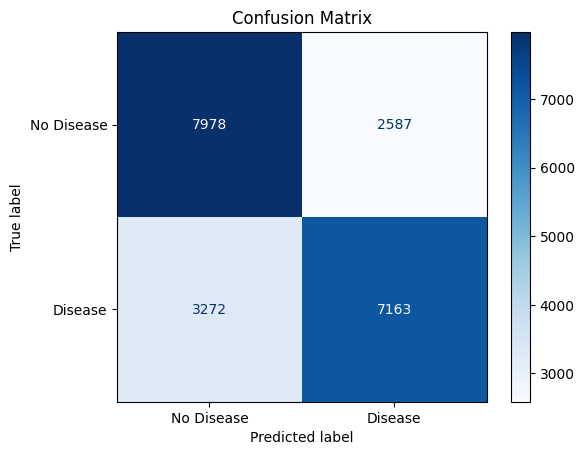

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()
